<h1><b>Sentiment Anlysis on Group WhatsApp chat

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [35]:
chat =  pd.read_csv('/root/Documents/Projects/NLP/NLP Datasets/WhatsApp-Chat/WhatsApp Chat with IS Boys☠.txt',error_bad_lines=False,names=['date','details'])

In [3]:
chat.head()

,date,details
0,9/22/19,8:41 AM - Messages to this group are now secu...
1,9/22/19,8:34 AM - Mukund Coep: 😂😂😂
2,9/12/19,"11:20 AM - Mukund Coep created group ""IS Boys☠"""
3,9/22/19,8:34 AM - Mukund Coep added you
4,9/22/19,9:59 AM - Akash Coep: 😂😂😂


In [4]:
chat.drop('date',axis=1,inplace=True)

In [5]:
chat.drop(0,inplace=True)

In [6]:
chat.head()

,details
1,8:34 AM - Mukund Coep: 😂😂😂
2,"11:20 AM - Mukund Coep created group ""IS Boys☠"""
3,8:34 AM - Mukund Coep added you
4,9:59 AM - Akash Coep: 😂😂😂
5,11:13 AM - Amar Coep: 😂😂😂😂


In [7]:
chat['details'][1].split('-')[1].split(':')

[' Mukund Coep', ' 😂😂😂']

In [8]:
chat['Info']=chat['details'].apply(lambda x: str(x).split('-')[-1])
chat['user']=chat['Info'].apply(lambda x: str(x).split(':')[0])
chat['msg']=chat['Info'].apply(lambda x: str(x).split(':')[-1])

In [9]:
chat.drop(['details','Info'],axis=1,inplace=True)

In [10]:
chat['user'].value_counts()

 Ritendra🙂                               131
 Akash Coep                               59
 Amar Coep                                55
 Mukund Coep                              33
 Jayesh IS COEP                           26
 Pushkaraj Coep                           16
 Ashish Coep                              16
 Swapnil Coep                             13
 Atharva Coep                             11
hB1TzoG7M                                  1
2 ahe                                      1
 Mukund Coep created group "IS Boys☠"      1
E[x]^2                                     1
 3.5| > 2.5}                               1
 You changed this group's icon             1
nan                                        1
 Mukund Coep added you                     1
 Shubham Coep                              1
Name: user, dtype: int64

In [11]:

unusally = []
chat.dropna(inplace=True)

for i,user in chat['user'].iteritems():
    if (user==" You changed this group's icon") or (user=="2 ahe") or (user=="E[x]^2")or(user==' Mukund Coep created group "IS Boys☠"')or(user==' 3.5| > 2.5}')or(user==" Mukund Coep added you")or(user=='hB1TzoG7M')or(user=='nan'):
        unusally.append(i)

In [12]:
chat.drop(unusally,inplace=True)

In [13]:
chat['user'].value_counts()

 Ritendra🙂         131
 Akash Coep         59
 Amar Coep          55
 Mukund Coep        33
 Jayesh IS COEP     26
 Ashish Coep        16
 Pushkaraj Coep     16
 Swapnil Coep       13
 Atharva Coep       11
 Shubham Coep        1
Name: user, dtype: int64

In [14]:
chat.head()

,user,msg
1,Mukund Coep,😂😂😂
4,Akash Coep,😂😂😂
5,Amar Coep,😂😂😂😂
6,Akash Coep,<Media omitted>
7,Mukund Coep,😂😂


In [15]:
chat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 1 to 369
Data columns (total 2 columns):
user    361 non-null object
msg     361 non-null object
dtypes: object(2)
memory usage: 8.5+ KB


In [16]:
#remove nan and empty row

blank = []
chat.dropna(inplace=True)

for i,msg in chat.msg.iteritems():
    if type(msg) == str:
        if msg.isspace():
            blank.append(i)

In [17]:
blank

[]

In [36]:
#emoji explaning in text
import re
from emot.emo_unicode import UNICODE_EMO,EMOTICONS

In [19]:
def emoToText(text):
    for em in UNICODE_EMO:
        text = text.replace(em,''.join(UNICODE_EMO[em]).replace("_"," ").replace(":",""))
    return text

txt="swap 😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒"
emoToText(txt)

'swap face with tears of joy. The feeling of making a sale smiling face with sunglasses, The feeling of actually fulfilling orders unamused face'

In [20]:
chat['Updated_msg'] = chat['msg'].apply(lambda x: emoToText(x))

In [21]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [22]:
sid = SentimentIntensityAnalyzer()

In [23]:
a = 'movie is very good and very beutyfull'
sid.polarity_scores(chat['msg'][356])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [24]:
chat['Updated_msg'].apply(lambda x: sid.polarity_scores(x)['compound'])

1      0.0258
4      0.0258
5     -0.2023
6      0.0000
7      0.2500
        ...  
365    0.0000
366    0.0000
367    0.0000
368    0.4588
369    0.2500
Name: Updated_msg, Length: 361, dtype: float64

In [25]:
chat['compound_score']=chat['Updated_msg'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [26]:
chat.head()

,user,msg,Updated_msg,compound_score
1,Mukund Coep,😂😂😂,face with tears of joyface with tears of joyf...,0.0258
4,Akash Coep,😂😂😂,face with tears of joyface with tears of joyf...,0.0258
5,Amar Coep,😂😂😂😂,face with tears of joyface with tears of joyf...,-0.2023
6,Akash Coep,<Media omitted>,<Media omitted>,0.0000
7,Mukund Coep,😂😂,face with tears of joyface with tears of joy,0.2500


In [27]:
chat['emotions']=chat['compound_score'].apply(lambda x: 'Positive' if x>0 else('Neutral' if x==0 else 'Negative'))

In [28]:
chat.head()

,user,msg,Updated_msg,compound_score,emotions
1,Mukund Coep,😂😂😂,face with tears of joyface with tears of joyf...,0.0258,Positive
4,Akash Coep,😂😂😂,face with tears of joyface with tears of joyf...,0.0258,Positive
5,Amar Coep,😂😂😂😂,face with tears of joyface with tears of joyf...,-0.2023,Negative
6,Akash Coep,<Media omitted>,<Media omitted>,0.0000,Neutral
7,Mukund Coep,😂😂,face with tears of joyface with tears of joy,0.2500,Positive


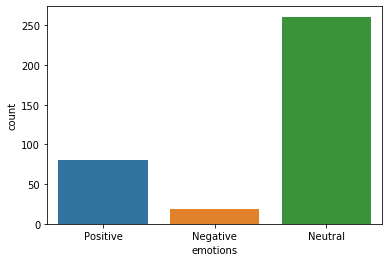

In [29]:
#overall emotions
sns.countplot(chat['emotions'])

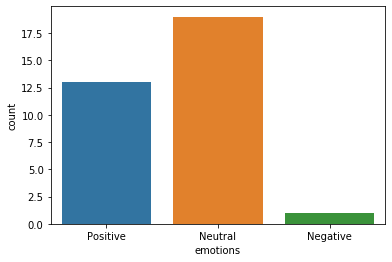

In [30]:
#Ritendra emotions during chat
sns.countplot(chat[chat['user']==' Mukund Coep']['emotions'])

In [31]:
#pip install emot

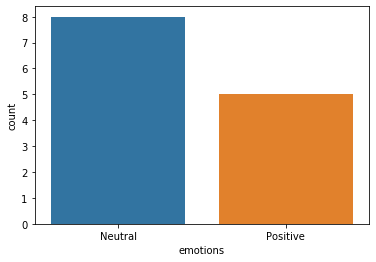

In [32]:
#Swapnil emotions during chat
sns.countplot(chat[chat['user']==' Swapnil Coep']['emotions'])

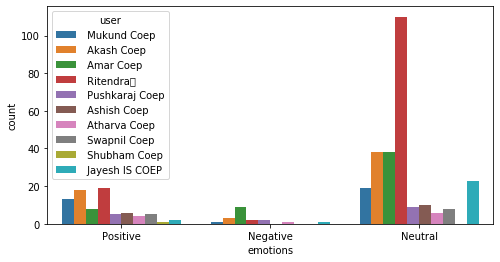

In [34]:
plt.figure(figsize=(8,4))
sns.countplot(chat['emotions'],hue=chat['user'])